In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/DengueAndClimateBangladesh.csv")


In [5]:
df.head()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,2008,1,12.993929,25.059539,78.824885,1.286636,0
1,2008,2,13.658286,26.383448,72.602956,0.687685,0
2,2008,3,20.411250,31.367558,76.903226,0.974194,0
3,2008,4,22.771889,34.031619,73.943810,0.980952,0
4,2008,5,23.945625,34.171060,77.360369,7.021198,0


In [6]:
df.describe()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,2013.089552,6.425373,20.943415,30.848480,80.115577,27.840582,211.582090
std,3.233896,3.493015,4.830249,2.851090,5.253859,98.393795,451.214606
min,2008.000000,1.000000,10.597946,23.522676,67.548387,0.000000,0.000000
25%,2010.000000,3.000000,16.404490,29.277935,77.188214,0.547765,0.000000
50%,2013.000000,6.000000,22.935495,31.987028,80.093810,6.008095,36.000000
75%,2016.000000,9.000000,25.278970,32.676912,84.778111,12.774048,187.000000
max,2019.000000,12.000000,26.485821,35.769333,88.384071,689.161290,3087.000000


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2008-01-01 to 2019-02-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      134 non-null    int64  
 1   MONTH     134 non-null    int64  
 2   MIN       134 non-null    float64
 3   MAX       134 non-null    float64
 4   HUMIDITY  134 non-null    float64
 5   RAINFALL  134 non-null    float64
 6   DENGUE    134 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 8.4 KB


In [22]:
df.dropna(inplace=True) # Remove rows with any missing values from the DataFrame.

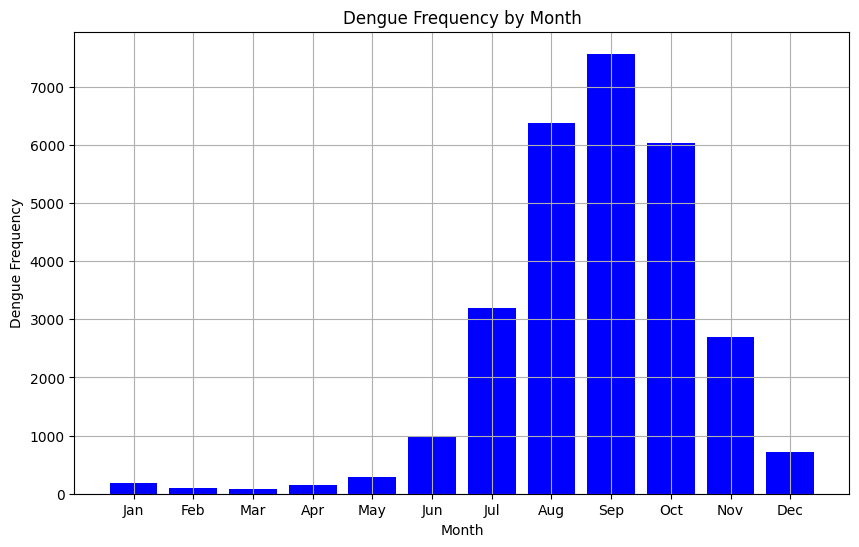

In [7]:
# Group data by month and sum the Dengue cases
monthly_dengue = df.groupby('MONTH')['DENGUE'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_dengue.index, monthly_dengue.values, color='blue')
plt.xlabel('Month')
plt.ylabel('Dengue Frequency')
plt.title('Dengue Frequency by Month')
plt.xticks(monthly_dengue.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Setting x-ticks to month names for clarity
plt.grid(True)
plt.show()

Scatter Plot

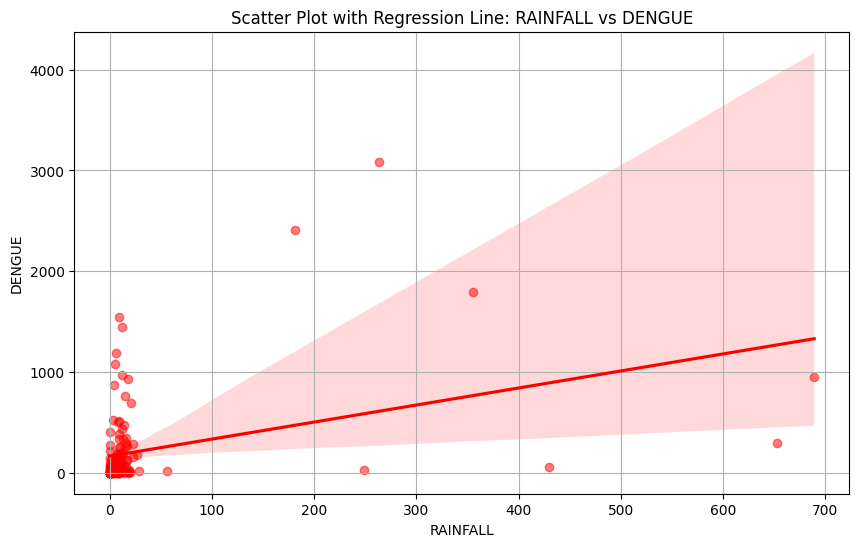

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line for RAINFALL vs DENGUE
plt.figure(figsize=(10, 6))
sns.regplot(x='RAINFALL', y='DENGUE', data=df, scatter_kws={'alpha':0.5}, color='red')
plt.title('Scatter Plot with Regression Line: RAINFALL vs DENGUE')
plt.xlabel('RAINFALL')
plt.ylabel('DENGUE')
plt.grid()
plt.show()

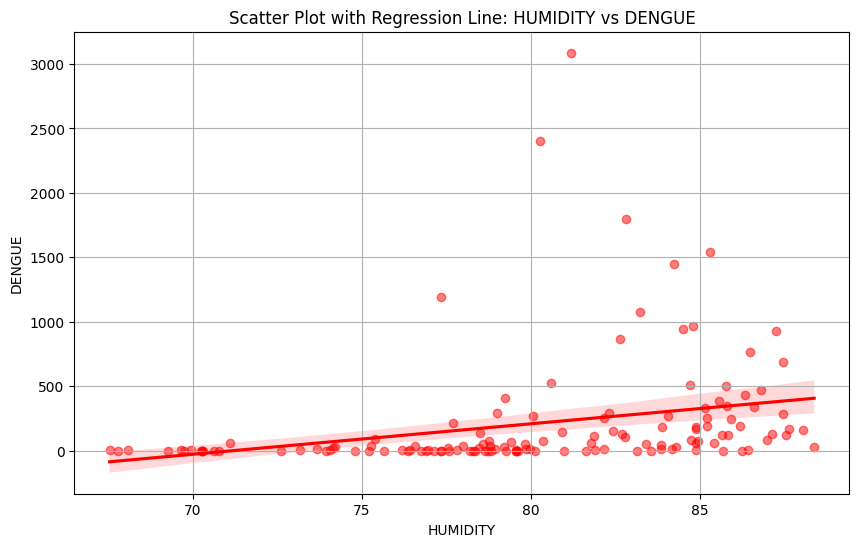

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(x='HUMIDITY', y='DENGUE', data=df, scatter_kws={'alpha':0.5}, color='red')
plt.title('Scatter Plot with Regression Line: HUMIDITY vs DENGUE')
plt.xlabel('HUMIDITY')
plt.ylabel('DENGUE')
plt.grid()
plt.show()

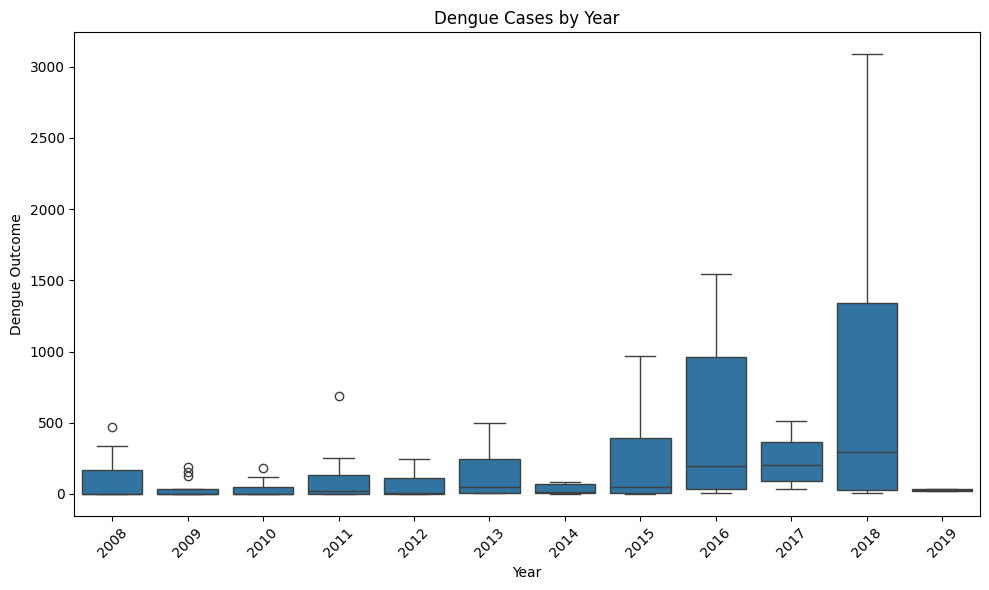

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='YEAR', y='DENGUE', data=df)
plt.title('Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Dengue Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Heat Map

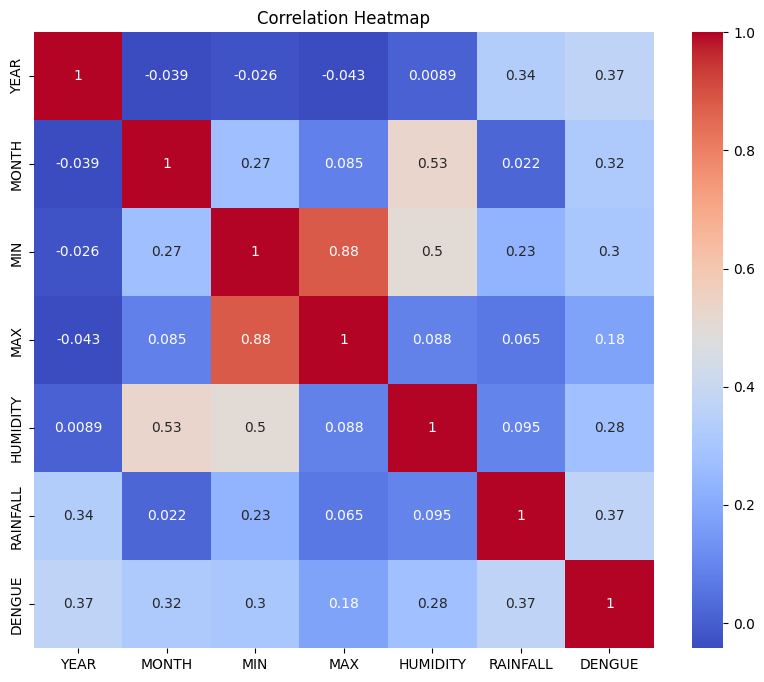

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Violin Plot

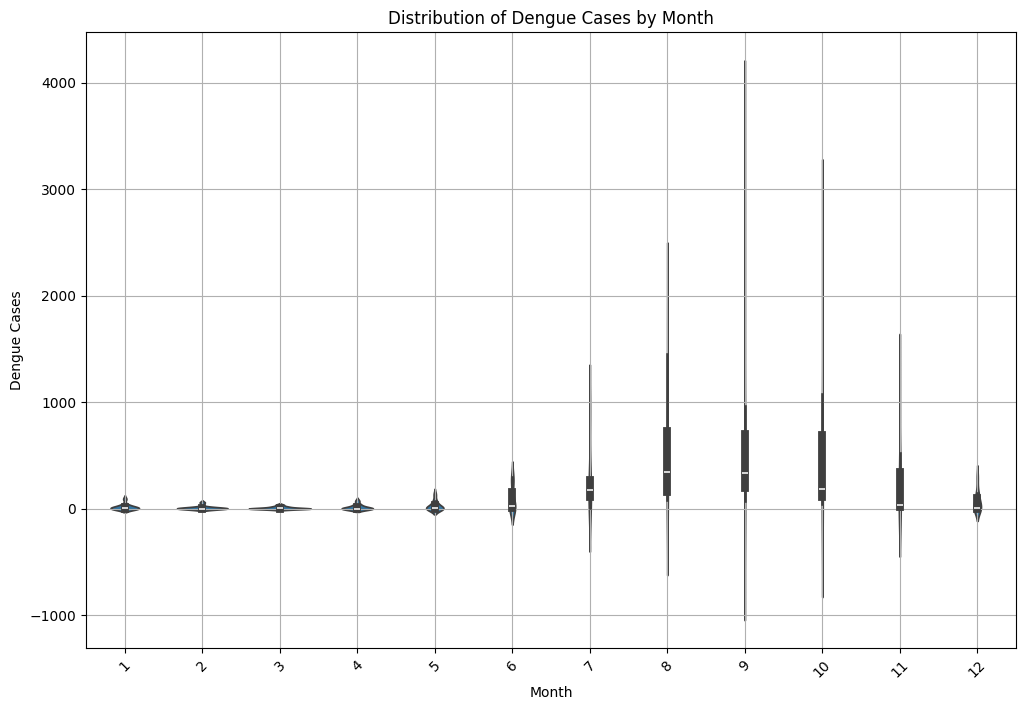

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Use 'MONTH' instead of 'Month'
sns.violinplot(x='MONTH', y='DENGUE', data=df)

# Customize the plot
plt.title('Distribution of Dengue Cases by Month')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)

# Show the plot
plt.show()

Line Plot

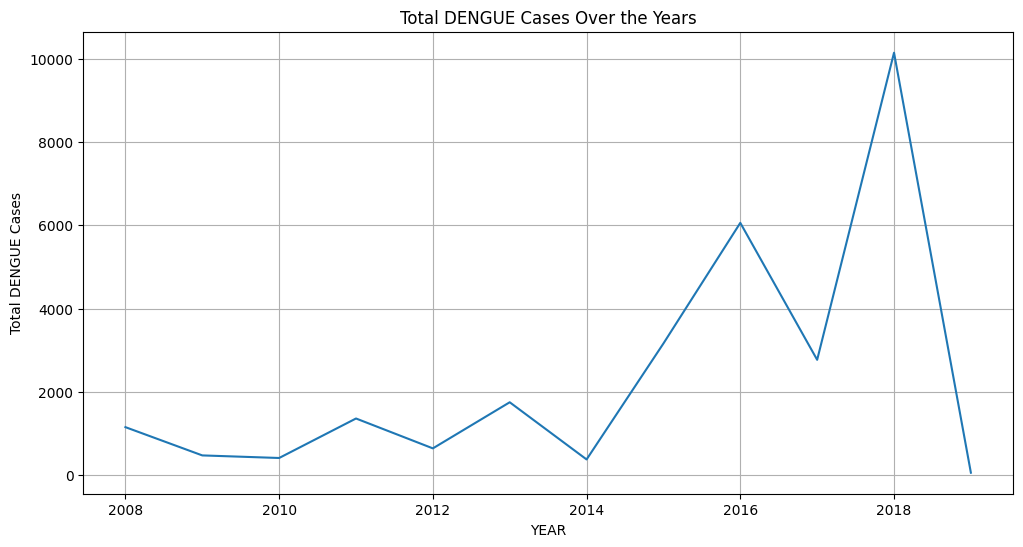

In [13]:
# Line plot of DENGUE cases over the years
plt.figure(figsize=(12, 6))
df.groupby('YEAR')['DENGUE'].sum().plot(kind='line')
plt.title('Total DENGUE Cases Over the Years')
plt.xlabel('YEAR')
plt.ylabel('Total DENGUE Cases')
plt.grid()
plt.show()

Stacked Bar Plot

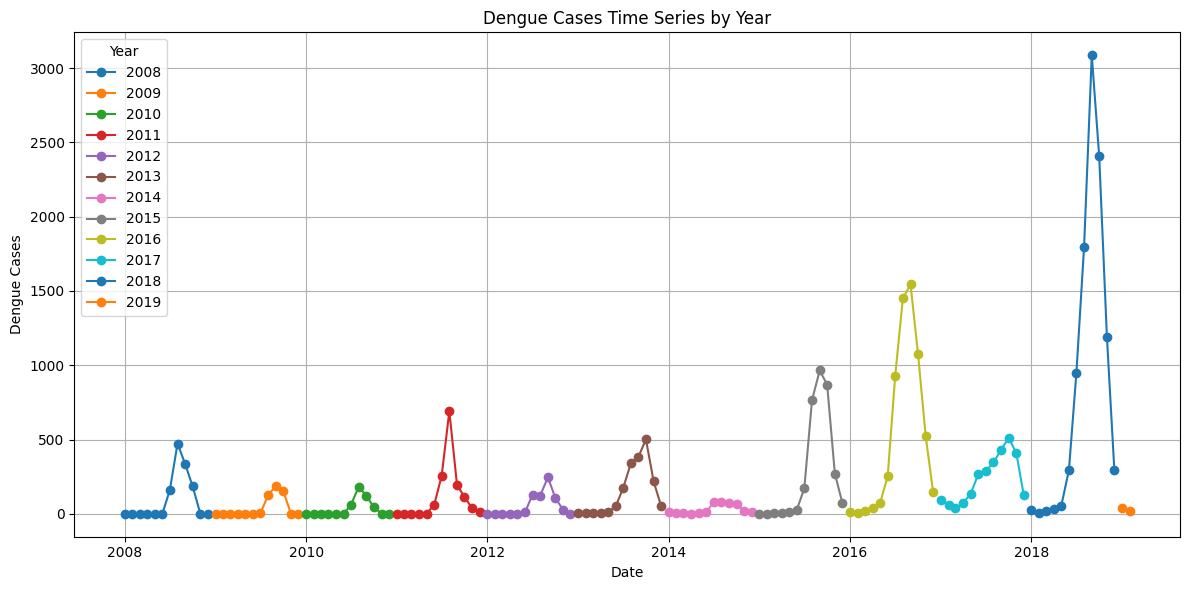

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert YEAR and MONTH into a datetime format
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Set the DATE as the index
df.set_index('DATE', inplace=True)

# Create a new figure for the plot
plt.figure(figsize=(12, 6))

# Plot dengue cases for each year
for year in df['YEAR'].unique():
    yearly_data = df[df['YEAR'] == year]
    plt.plot(yearly_data.index, yearly_data['DENGUE'], marker='o', label=str(year))

# Adding titles and labels
plt.title('Dengue Cases Time Series by Year')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')
plt.legend(title='Year')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

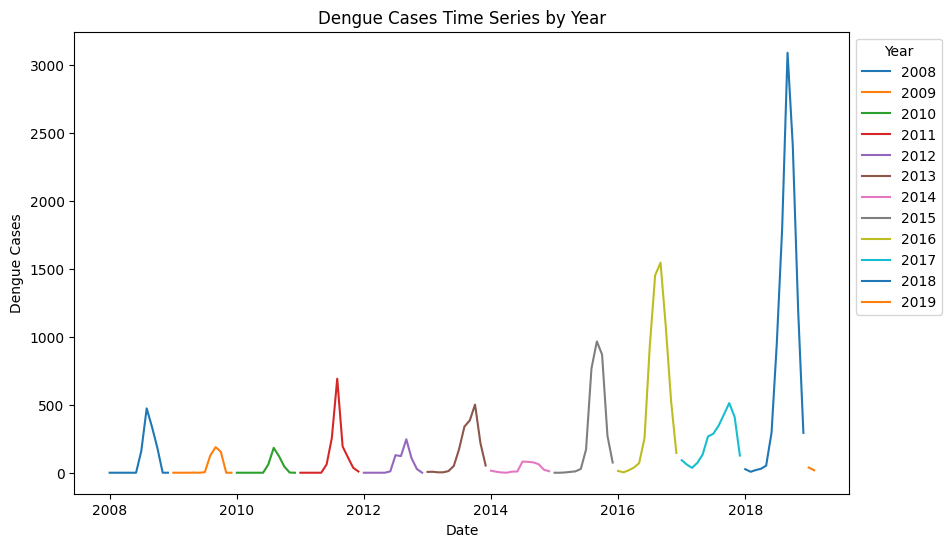

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'YEAR' and 'MONTH' to a datetime object
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Set the DATE column as the index
df.set_index('DATE', inplace=True)

# Plot each year's dengue cases with a different color
fig, ax = plt.subplots(figsize=(10, 6))
for year in df['YEAR'].unique():
    yearly_data = df[df['YEAR'] == year]
    ax.plot(yearly_data.index, yearly_data['DENGUE'], label=str(year))

# Set plot title and labels
ax.set_title('Dengue Cases Time Series by Year')
ax.set_xlabel('Date')
ax.set_ylabel('Dengue Cases')

# Enable the legend
ax.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

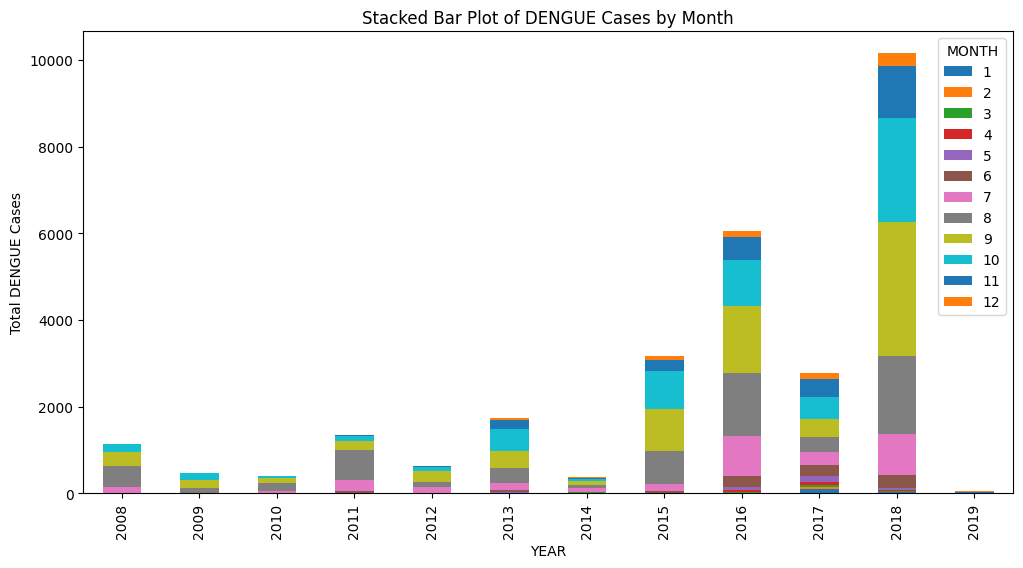

In [23]:
# Stacked bar plot of DENGUE cases by MONTH
monthly_dengue = df.groupby(['YEAR', 'MONTH'])['DENGUE'].sum().unstack()
monthly_dengue.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of DENGUE Cases by Month')
plt.xlabel('YEAR')
plt.ylabel('Total DENGUE Cases')
plt.legend(title='MONTH')
plt.show()

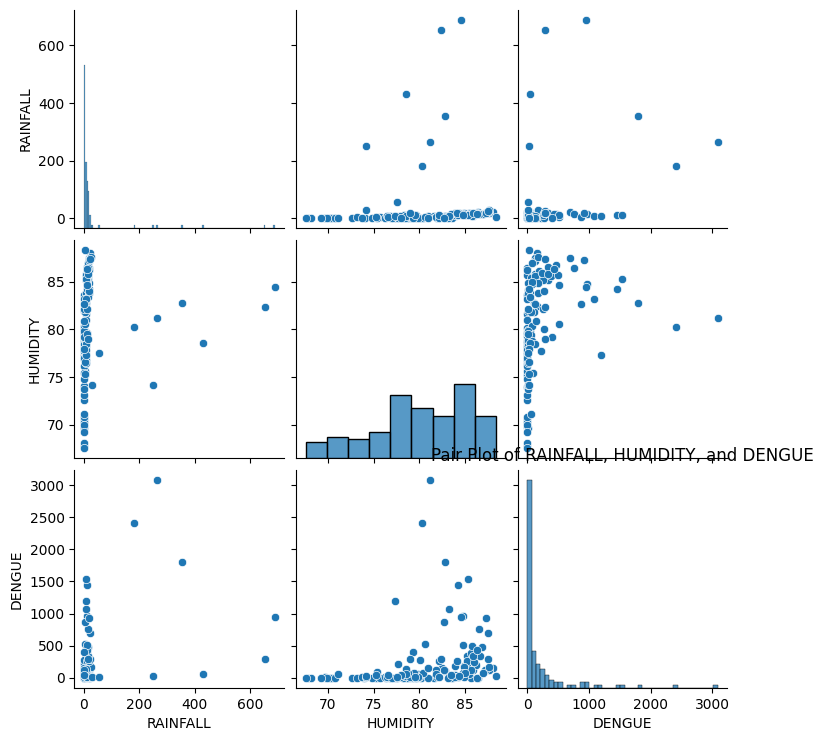

In [24]:
import seaborn as sns

# Pair plot to visualize relationships between multiple features
sns.pairplot(df[['RAINFALL', 'HUMIDITY', 'DENGUE']])
plt.title('Pair Plot of RAINFALL, HUMIDITY, and DENGUE')
plt.show()

Scatter Matrix

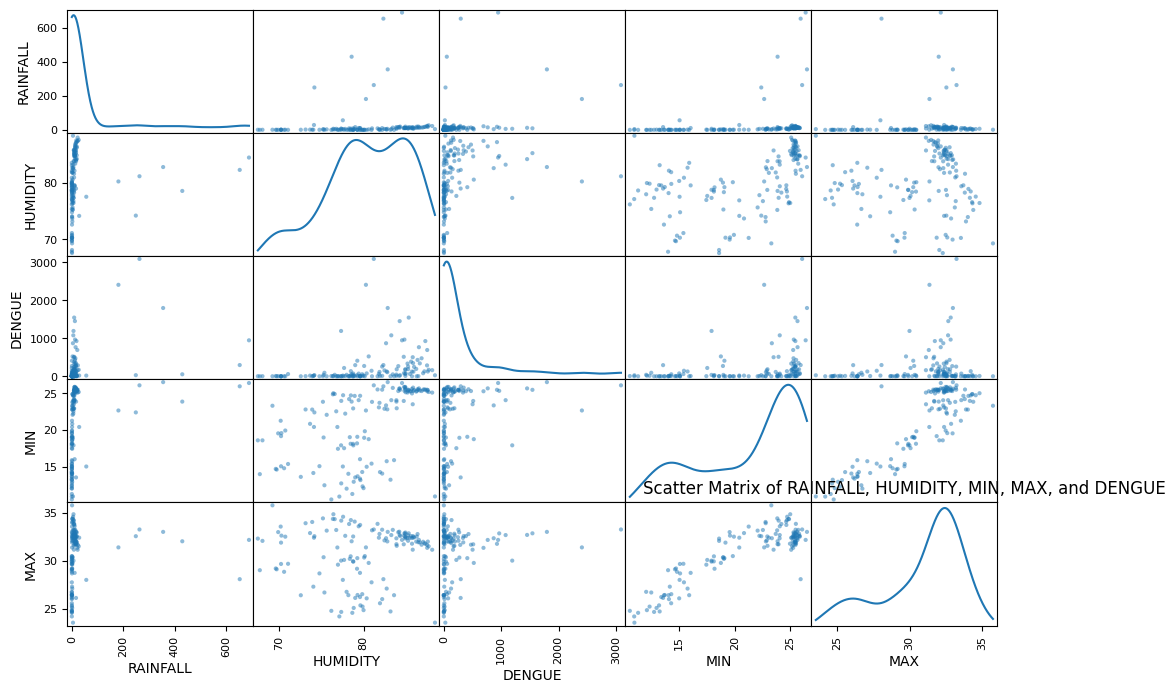

In [25]:
# Scatter matrix for multiple features
from pandas.plotting import scatter_matrix

scatter_matrix(df[['RAINFALL', 'HUMIDITY', 'DENGUE', 'MIN', 'MAX']], alpha=0.5, figsize=(12, 8), diagonal='kde')
plt.title('Scatter Matrix of RAINFALL, HUMIDITY, MIN, MAX, and DENGUE')
plt.show()

Time Series Plot

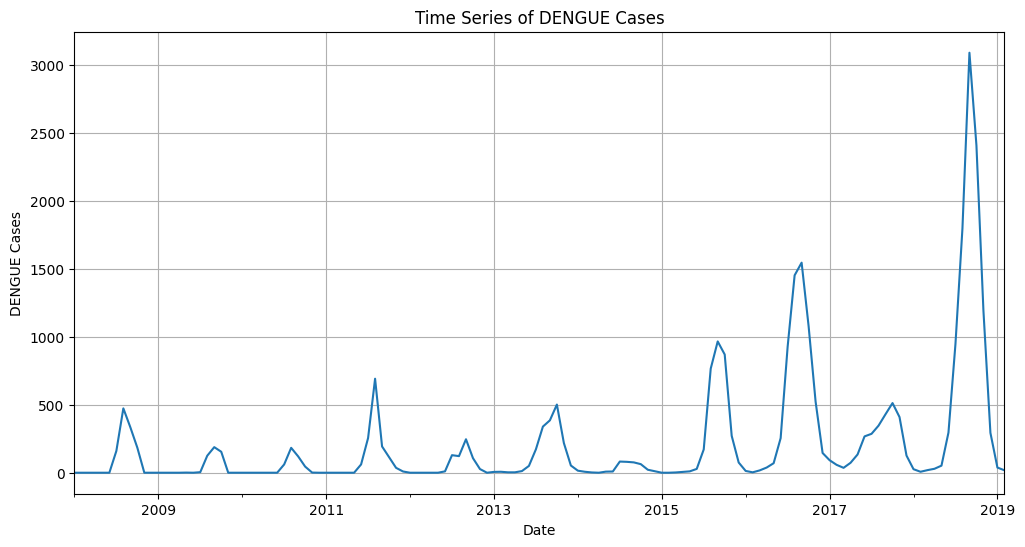

In [26]:
# Time series plot of DENGUE cases
plt.figure(figsize=(12, 6))
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
df.set_index('DATE')['DENGUE'].plot()
plt.title('Time Series of DENGUE Cases')
plt.xlabel('Date')
plt.ylabel('DENGUE Cases')
plt.grid()
plt.show()

Radar Chart

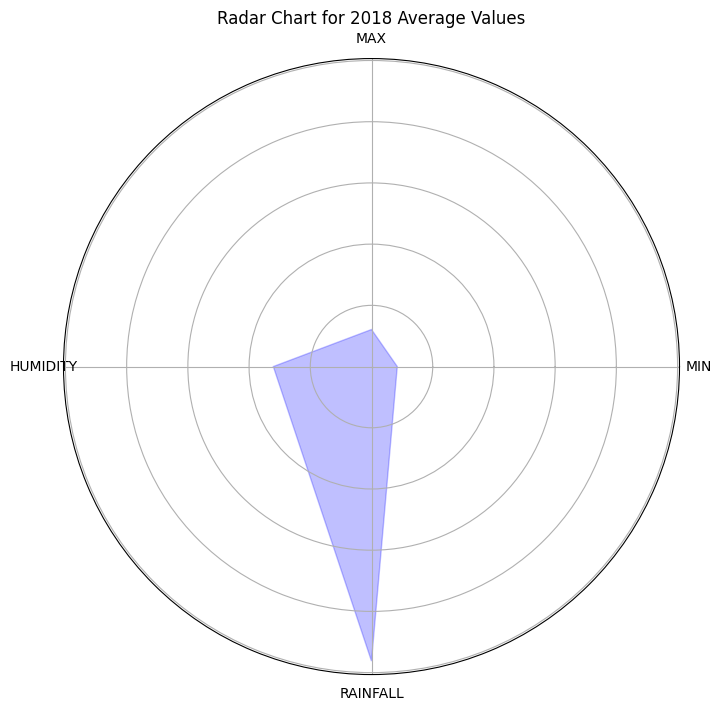

In [27]:
import numpy as np

# Radar chart for comparison (example for one year)
categories = ['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']
values = df[df['YEAR'] == 2018][categories].mean().values
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values,[values[0]]))
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='blue', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Chart for 2018 Average Values')
plt.show()

Funnel Plot

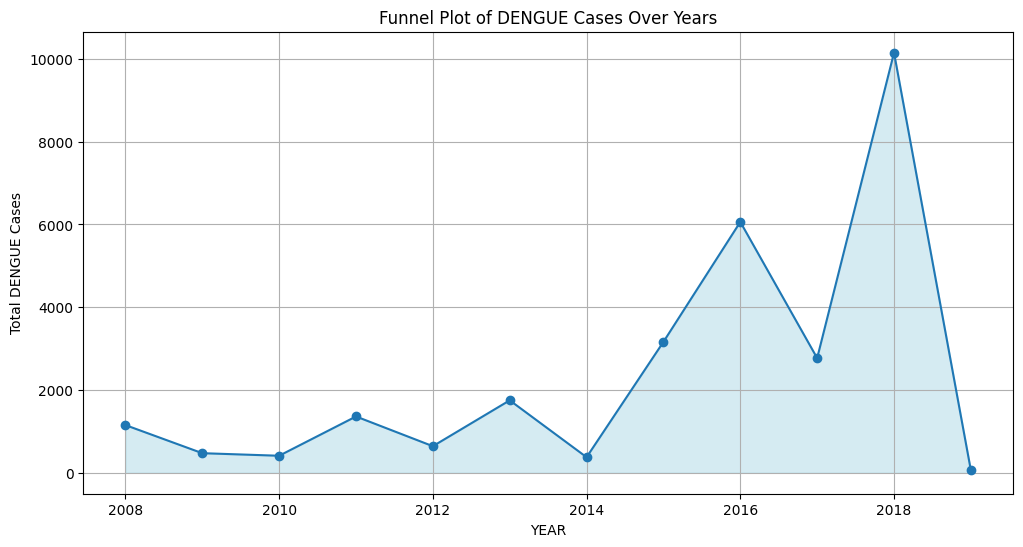

In [28]:
# Funnel plot for DENGUE cases over years
dengue_yearly = df.groupby('YEAR')['DENGUE'].sum()
plt.figure(figsize=(12, 6))
plt.plot(dengue_yearly.index, dengue_yearly.values, marker='o')
plt.fill_between(dengue_yearly.index, dengue_yearly.values, color='lightblue', alpha=0.5)
plt.title('Funnel Plot of DENGUE Cases Over Years')
plt.xlabel('YEAR')
plt.ylabel('Total DENGUE Cases')
plt.grid()
plt.show()

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


**K means Clustering**

In [30]:
dfp= df[['MONTH','MAX','MIN','HUMIDITY','RAINFALL','DENGUE']]

In [31]:
numeric_dfp = df.select_dtypes(include=['number'])

scaler = MinMaxScaler()
scaler.fit(numeric_dfp)
scaled = pd.DataFrame(scaler.transform(numeric_dfp),columns=numeric_dfp.columns)
scaled.head()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,0.0,0.000000,0.150806,0.125492,0.541211,0.001867,0.0
1,0.0,0.090909,0.192621,0.233596,0.242592,0.000998,0.0
2,0.0,0.181818,0.617660,0.640573,0.448982,0.001414,0.0
3,0.0,0.272727,0.766241,0.858107,0.306946,0.001423,0.0
4,0.0,0.363636,0.840117,0.869493,0.470922,0.010188,0.0


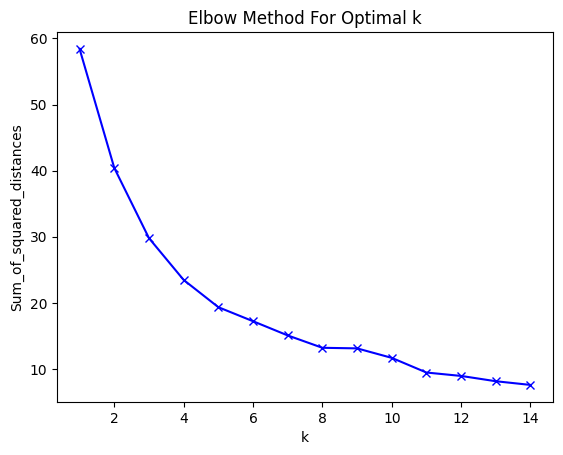

In [32]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[2 2 3 3 3 1 1 1 1 1 0 0 2 2 3 3 3 1 1 1 1 1 0 0 2 2 3 3 3 1 1 1 1 1 0 0 2
 2 3 3 3 1 1 1 1 1 0 0 2 2 3 3 3 1 1 1 1 1 0 0 2 2 3 3 1 1 1 1 1 1 0 0 2 2
 3 3 3 1 1 1 1 1 0 0 2 2 3 3 3 1 1 1 1 1 0 0 2 2 3 3 3 1 1 1 1 1 0 0 2 2 3
 3 3 1 1 1 1 1 0 0 2 2 3 3 3 1 1 1 1 1 0 0 2 2]


In [34]:
dfp["k_means_Cluster"] = labels
dfp

<ipython-input-34-aed94feae75a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["k_means_Cluster"] = labels


,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE,k_means_Cluster
DATE,,,,,,,
2008-01-01,1,25.059539,12.993929,78.824885,1.286636,0,2
2008-02-01,2,26.383448,13.658286,72.602956,0.687685,0,2
2008-03-01,3,31.367558,20.411250,76.903226,0.974194,0,3
2008-04-01,4,34.031619,22.771889,73.943810,0.980952,0,3
2008-05-01,5,34.171060,23.945625,77.360369,7.021198,0,3
...,...,...,...,...,...,...,...
2018-10-01,10,31.378430,22.646866,80.263091,181.225807,2406,1
2018-11-01,11,29.997776,17.928140,77.340873,6.500000,1192,0
2018-12-01,12,26.104022,13.580792,79.003900,16.225806,293,0


In [35]:
dfp.groupby('k_means_Cluster').mean()

,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE
k_means_Cluster,,,,,,
0,11.500000,28.152681,16.503607,79.987957,1.457495,155.000000
1,7.946429,32.229173,25.041458,84.846397,49.942636,431.232143
2,1.500000,26.903963,13.569695,75.989150,3.274906,12.083333
3,3.968750,33.244019,22.354495,75.019204,25.724617,15.718750


**DBSCAN**

In [36]:
dfd= df[['MONTH','MAX','MIN','HUMIDITY','RAINFALL','DENGUE']]

In [37]:
numeric_dfd = df.select_dtypes(include=['number'])

scaler = MinMaxScaler()
scaler.fit(numeric_dfd)
scaled = pd.DataFrame(scaler.transform(numeric_dfd),columns=numeric_dfd.columns)
scaled.head()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,0.0,0.000000,0.150806,0.125492,0.541211,0.001867,0.0
1,0.0,0.090909,0.192621,0.233596,0.242592,0.000998,0.0
2,0.0,0.181818,0.617660,0.640573,0.448982,0.001414,0.0
3,0.0,0.272727,0.766241,0.858107,0.306946,0.001423,0.0
4,0.0,0.363636,0.840117,0.869493,0.470922,0.010188,0.0


In [38]:
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Assuming 'scaled' is your DataFrame - change to the correct name as needed.
# Fit the model and get cluster labels
dbscan_result = dbscan.fit_predict(scaled)

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)
dbscan_result


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0])

In [39]:
dfd["dbscan_clusters"] = dbscan_result
dfd

<ipython-input-39-947113b4a59d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd["dbscan_clusters"] = dbscan_result


,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE,dbscan_clusters
DATE,,,,,,,
2008-01-01,1,25.059539,12.993929,78.824885,1.286636,0,0
2008-02-01,2,26.383448,13.658286,72.602956,0.687685,0,0
2008-03-01,3,31.367558,20.411250,76.903226,0.974194,0,0
2008-04-01,4,34.031619,22.771889,73.943810,0.980952,0,0
2008-05-01,5,34.171060,23.945625,77.360369,7.021198,0,0
...,...,...,...,...,...,...,...
2018-10-01,10,31.378430,22.646866,80.263091,181.225807,2406,-1
2018-11-01,11,29.997776,17.928140,77.340873,6.500000,1192,0
2018-12-01,12,26.104022,13.580792,79.003900,16.225806,293,0


In [40]:
dfd.groupby('dbscan_clusters').mean()

,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE
dbscan_clusters,,,,,,
-1,8.000000,31.569851,25.494377,82.219934,428.389247,1706.000000
0,6.364341,30.820520,20.767021,80.034013,12.315440,153.658915


**Gaussian Cluster**

In [41]:
dfg= df[['MONTH','MAX','MIN','HUMIDITY','RAINFALL','DENGUE']]

In [42]:
numeric_dfg = df.select_dtypes(include=['number'])

scaler = MinMaxScaler()
scaler.fit(numeric_dfg)
scaled = pd.DataFrame(scaler.transform(numeric_dfg),columns=numeric_dfg.columns)
scaled.head()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,0.0,0.000000,0.150806,0.125492,0.541211,0.001867,0.0
1,0.0,0.090909,0.192621,0.233596,0.242592,0.000998,0.0
2,0.0,0.181818,0.617660,0.640573,0.448982,0.001414,0.0
3,0.0,0.272727,0.766241,0.858107,0.306946,0.001423,0.0
4,0.0,0.363636,0.840117,0.869493,0.470922,0.010188,0.0


In [43]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture


# define the model
gaussian_model = GaussianMixture(n_components=2)

# assign each data point to a cluster
gaussian_result = gaussian_model.fit_predict(scaled) # use fit_predict instead of fit_predictpredict

# get all of the unique clusters
gaussian_clusters = unique(gaussian_result)

In [44]:
dfg["gaussian_clusters"] = gaussian_result
dfg

<ipython-input-44-bb67bcfad10a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg["gaussian_clusters"] = gaussian_result


,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE,gaussian_clusters
DATE,,,,,,,
2008-01-01,1,25.059539,12.993929,78.824885,1.286636,0,1
2008-02-01,2,26.383448,13.658286,72.602956,0.687685,0,1
2008-03-01,3,31.367558,20.411250,76.903226,0.974194,0,1
2008-04-01,4,34.031619,22.771889,73.943810,0.980952,0,1
2008-05-01,5,34.171060,23.945625,77.360369,7.021198,0,1
...,...,...,...,...,...,...,...
2018-10-01,10,31.378430,22.646866,80.263091,181.225807,2406,0
2018-11-01,11,29.997776,17.928140,77.340873,6.500000,1192,0
2018-12-01,12,26.104022,13.580792,79.003900,16.225806,293,1


In [45]:
dfg.groupby('gaussian_clusters').mean()

,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE
gaussian_clusters,,,,,,
0,8.541667,31.781868,24.100075,83.260894,124.757302,902.583333
1,5.963636,30.644832,20.254689,79.429327,6.695116,60.818182


In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch, AffinityPropagation, AgglomerativeClustering

dfb = df[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']]
dfa = df[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']]
dfag = df[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']]

numeric_dfb = dfb.select_dtypes(include=['number'])
numeric_dfa = dfa.select_dtypes(include=['number'])
numeric_dfag = dfag.select_dtypes(include=['number'])

# BIRCH Clustering
birch_model = Birch(n_clusters=4)
birch_result = birch_model.fit_predict(scaled)


# Affinity Propagation Clustering
affinity_model = AffinityPropagation(random_state=42)
affinity_result = affinity_model.fit_predict(scaled)

# Agglomerative Hierarchical Clustering
agg_model = AgglomerativeClustering(n_clusters=4)
agg_result = agg_model.fit_predict(scaled)


In [47]:
dfb['birch_clusters'] = birch_result
dfb

<ipython-input-47-53f2b3b02689>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['birch_clusters'] = birch_result


,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE,birch_clusters
DATE,,,,,,,
2008-01-01,1,25.059539,12.993929,78.824885,1.286636,0,3
2008-02-01,2,26.383448,13.658286,72.602956,0.687685,0,3
2008-03-01,3,31.367558,20.411250,76.903226,0.974194,0,0
2008-04-01,4,34.031619,22.771889,73.943810,0.980952,0,0
2008-05-01,5,34.171060,23.945625,77.360369,7.021198,0,0
...,...,...,...,...,...,...,...
2018-10-01,10,31.378430,22.646866,80.263091,181.225807,2406,1
2018-11-01,11,29.997776,17.928140,77.340873,6.500000,1192,2
2018-12-01,12,26.104022,13.580792,79.003900,16.225806,293,2


In [48]:
dfb.groupby('birch_clusters').mean()

,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE
birch_clusters,,,,,,
0,6.778947,32.241583,23.087744,80.722399,11.103159,180.705263
1,7.500000,31.644427,25.220239,81.613433,428.603943,1430.333333
2,11.833333,26.896484,15.054206,80.343156,2.173905,192.750000
3,1.428571,26.577221,13.386190,76.812430,3.720349,13.809524


In [49]:
dfa['affinity_clusters'] = affinity_result
dfa

<ipython-input-49-886dda7ac96b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['affinity_clusters'] = affinity_result


,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE,affinity_clusters
DATE,,,,,,,
2008-01-01,1,25.059539,12.993929,78.824885,1.286636,0,1
2008-02-01,2,26.383448,13.658286,72.602956,0.687685,0,3
2008-03-01,3,31.367558,20.411250,76.903226,0.974194,0,0
2008-04-01,4,34.031619,22.771889,73.943810,0.980952,0,0
2008-05-01,5,34.171060,23.945625,77.360369,7.021198,0,0
...,...,...,...,...,...,...,...
2018-10-01,10,31.378430,22.646866,80.263091,181.225807,2406,14
2018-11-01,11,29.997776,17.928140,77.340873,6.500000,1192,12
2018-12-01,12,26.104022,13.580792,79.003900,16.225806,293,12


In [50]:
dfa.groupby('affinity_clusters').mean()

,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE
affinity_clusters,,,,,,
0,4.500000,33.647362,23.601635,77.521357,5.310927,0.083333
1,1.000000,24.896184,12.019211,77.956375,0.294777,1.000000
2,8.227273,32.136692,24.872705,85.338791,12.286777,173.636364
3,2.000000,28.487928,14.452723,70.685498,0.348477,2.000000
4,11.000000,30.019126,18.399276,78.771973,0.397959,43.428571
5,12.000000,25.988919,14.270546,80.990038,0.186175,10.333333
6,3.222222,33.059902,20.308293,69.958926,0.844718,1.111111
7,7.200000,32.300926,25.192576,85.227760,15.104262,126.133333
8,8.909091,32.313376,24.866259,85.141662,11.111146,853.272727


In [51]:
dfag['agg_clusters'] = agg_result
dfag

<ipython-input-51-cf9c4ced5474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfag['agg_clusters'] = agg_result


,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE,agg_clusters
DATE,,,,,,,
2008-01-01,1,25.059539,12.993929,78.824885,1.286636,0,3
2008-02-01,2,26.383448,13.658286,72.602956,0.687685,0,3
2008-03-01,3,31.367558,20.411250,76.903226,0.974194,0,1
2008-04-01,4,34.031619,22.771889,73.943810,0.980952,0,1
2008-05-01,5,34.171060,23.945625,77.360369,7.021198,0,1
...,...,...,...,...,...,...,...
2018-10-01,10,31.378430,22.646866,80.263091,181.225807,2406,0
2018-11-01,11,29.997776,17.928140,77.340873,6.500000,1192,2
2018-12-01,12,26.104022,13.580792,79.003900,16.225806,293,2


In [52]:
dfag.groupby('agg_clusters').mean()

,MONTH,MAX,MIN,HUMIDITY,RAINFALL,DENGUE
agg_clusters,,,,,,
0,7.859649,32.202854,24.966082,84.606139,60.819520,425.087719
1,3.742857,32.813709,21.398214,74.351393,4.291233,11.228571
2,11.500000,28.152681,16.503607,79.987957,1.457495,155.000000
3,1.450000,26.514745,13.566702,77.545182,4.083364,15.950000


In [53]:
# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfp.groupby('k_means_Cluster')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (K-means_clustering):")
print(max_dengue_cluster)

Cluster with the Maximum Average Dengue Cases (K-means_clustering):
   k_means_Cluster     MONTH        MAX        MIN   HUMIDITY   RAINFALL  \
1                1  7.946429  32.229173  25.041458  84.846397  49.942636   

       DENGUE  
1  431.232143  


In [54]:
# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfd.groupby('dbscan_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (DBSCAN clustering):")
print(max_dengue_cluster)

Cluster with the Maximum Average Dengue Cases (DBSCAN clustering):
   dbscan_clusters  MONTH        MAX        MIN   HUMIDITY    RAINFALL  DENGUE
0               -1    8.0  31.569851  25.494377  82.219934  428.389247  1706.0


In [55]:
# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfg.groupby('gaussian_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (Gaussian Mixture Model):")
print(max_dengue_cluster)

Cluster with the Maximum Average Dengue Cases (Gaussian Mixture Model):
   gaussian_clusters     MONTH        MAX        MIN   HUMIDITY    RAINFALL  \
0                  0  8.541667  31.781868  24.100075  83.260894  124.757302   

       DENGUE  
0  902.583333  


In [56]:
# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfb.groupby('birch_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (BIRCH):")
print(max_dengue_cluster)

Cluster with the Maximum Average Dengue Cases (BIRCH):
   birch_clusters  MONTH        MAX        MIN   HUMIDITY    RAINFALL  \
1               1    7.5  31.644427  25.220239  81.613433  428.603943   

        DENGUE  
1  1430.333333  


In [57]:
# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfa.groupby('affinity_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (Affinity Propagation clustering):")
print(max_dengue_cluster)

Cluster with the Maximum Average Dengue Cases (Affinity Propagation clustering):
    affinity_clusters  MONTH        MAX        MIN   HUMIDITY    RAINFALL  \
14                 14    9.0  32.541957  25.061826  81.424696  266.539427   

         DENGUE  
14  2429.666667  


In [58]:
# Calculate the mean number of Dengue cases for each cluster
mean_dengue_by_cluster = dfag.groupby('agg_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index() # Changed df to dfag

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (Agglomerative Hierarchy clustering):")
print(max_dengue_cluster)

Cluster with the Maximum Average Dengue Cases (Agglomerative Hierarchy clustering):
   agg_clusters     MONTH        MAX        MIN   HUMIDITY  RAINFALL  \
0             0  7.859649  32.202854  24.966082  84.606139  60.81952   

       DENGUE  
0  425.087719  


In [59]:
# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfp.groupby('k_means_Cluster')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (K-means_clustering):")
print(max_dengue_cluster)

print("-------------------------------------------------------------------")

# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfd.groupby('dbscan_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (DBSCAN clustering):")
print(max_dengue_cluster)

print("-------------------------------------------------------------------")

# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfg.groupby('gaussian_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (Gaussian Mixture Model):")
print(max_dengue_cluster)

print("-------------------------------------------------------------------")

# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfb.groupby('birch_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (BIRCH):")
print(max_dengue_cluster)

("-------------------------------------------------------------------")

# Calculate the mean number of Dengue cases for each cluster along with other metrics
mean_dengue_by_cluster = dfa.groupby('affinity_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (Affinity Propagation clustering):")
print(max_dengue_cluster)

("-------------------------------------------------------------------")

# Calculate the mean number of Dengue cases for each cluster
mean_dengue_by_cluster = dfag.groupby('agg_clusters')[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index() # Changed df to dfag

# Find the cluster with the maximum average Dengue cases
max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]

# Display the result
print("Cluster with the Maximum Average Dengue Cases (Agglomerative Hierarchy clustering):")
print(max_dengue_cluster)

("-------------------------------------------------------------------")

Cluster with the Maximum Average Dengue Cases (K-means_clustering):
   k_means_Cluster     MONTH        MAX        MIN   HUMIDITY   RAINFALL  \
1                1  7.946429  32.229173  25.041458  84.846397  49.942636   

       DENGUE  
1  431.232143  
-------------------------------------------------------------------
Cluster with the Maximum Average Dengue Cases (DBSCAN clustering):
   dbscan_clusters  MONTH        MAX        MIN   HUMIDITY    RAINFALL  DENGUE
0               -1    8.0  31.569851  25.494377  82.219934  428.389247  1706.0
-------------------------------------------------------------------
Cluster with the Maximum Average Dengue Cases (Gaussian Mixture Model):
   gaussian_clusters     MONTH        MAX        MIN   HUMIDITY    RAINFALL  \
0                  0  8.541667  31.781868  24.100075  83.260894  124.757302   

       DENGUE  
0  902.583333  
-------------------------------------------------------------------
Cluster with the Maximum Average Dengue Cases (BIRCH):


'-------------------------------------------------------------------'

In [60]:
import pandas as pd
from tabulate import tabulate

# Sample data creation (replace with actual data loading)
# Assuming dfs for K-Means, DBSCAN, Gaussian Mixture, BIRCH, Affinity Propagation, and Agglomerative are already defined as dfp, dfd, dfg, dfb, dfa, dfag

# Calculate the mean number of Dengue cases and other metrics for each cluster in each clustering model
clusters_data = {
    'K-Means': dfp,
    'DBSCAN': dfd,
    'Gaussian Mixture': dfg,
    'BIRCH': dfb,
    'Affinity Propagation': dfa,
    'Agglomerative': dfag
}

results = []

# Process each clustering result
for model_name, df in clusters_data.items():
    mean_dengue_by_cluster = df.groupby(df.columns[-1])[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].mean().reset_index()
    max_dengue_cluster = mean_dengue_by_cluster[mean_dengue_by_cluster['DENGUE'] == mean_dengue_by_cluster['DENGUE'].max()]
    results.append([model_name] + max_dengue_cluster.iloc[0].tolist())

# Create a DataFrame from results
results_df = pd.DataFrame(results, columns=['Clustering Method', 'Cluster ID', 'Mean Month', 'Mean Max Temp', 'Mean Min Temp', 'Mean Humidity', 'Mean Rainfall', 'Mean Dengue Cases'])

print("Clusters with the Maximum Dengue Cases for each clustering method:")

# Print the results in a table format using tabulate
print(tabulate(results_df, headers='keys', tablefmt='psql', showindex=False))

Clusters with the Maximum Dengue Cases for each clustering method:
+----------------------+--------------+--------------+-----------------+-----------------+-----------------+-----------------+---------------------+
| Clustering Method    |   Cluster ID |   Mean Month |   Mean Max Temp |   Mean Min Temp |   Mean Humidity |   Mean Rainfall |   Mean Dengue Cases |
|----------------------+--------------+--------------+-----------------+-----------------+-----------------+-----------------+---------------------|
| K-Means              |            1 |      7.94643 |         32.2292 |         25.0415 |         84.8464 |         49.9426 |             431.232 |
| DBSCAN               |           -1 |      8       |         31.5699 |         25.4944 |         82.2199 |        428.389  |            1706     |
| Gaussian Mixture     |            0 |      8.54167 |         31.7819 |         24.1001 |         83.2609 |        124.757  |             902.583 |
| BIRCH                |            1 |

In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Assuming df is your DataFrame and you've selected relevant features
features = df[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].select_dtypes(include=['number'])

# Scale the features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)

# K-Means Clustering
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(scaled)
kmeans_labels = k_means.labels_

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled)

# Gaussian Mixture Model Clustering
gaussian_model = GaussianMixture(n_components=2)
gaussian_labels = gaussian_model.fit_predict(scaled)

# Remaining models (from previous explanation)
birch_model = Birch(n_clusters=4)
birch_labels = birch_model.fit_predict(scaled)

affinity_model = AffinityPropagation(random_state=42)
affinity_labels = affinity_model.fit_predict(scaled)

agg_model = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_model.fit_predict(scaled)

# Function to evaluate clustering
def evaluate_clustering(labels, features):
    silhouette = silhouette_score(features, labels)
    davies = davies_bouldin_score(features, labels)
    calinski = calinski_harabasz_score(features, labels)
    return silhouette, davies, calinski

# Evaluating each model
evaluations = {}
evaluations['K-Means'] = evaluate_clustering(kmeans_labels, scaled)
evaluations['DBSCAN'] = evaluate_clustering(dbscan_labels, scaled)
evaluations['Gaussian Mixture'] = evaluate_clustering(gaussian_labels, scaled)
evaluations['BIRCH'] = evaluate_clustering(birch_labels, scaled)
evaluations['Affinity Propagation'] = evaluate_clustering(affinity_labels, scaled)
evaluations['Agglomerative'] = evaluate_clustering(agg_labels, scaled)

# Print the evaluation results
for model, scores in evaluations.items():
    print(f"{model} Clustering Evaluation:")
    print("Silhouette Score: {:.2f}, Davies-Bouldin Score: {:.2f}, Calinski-Harabasz Index: {:.2f}\n".format(*scores))

K-Means Clustering Evaluation:
Silhouette Score: 0.50, Davies-Bouldin Score: 0.74, Calinski-Harabasz Index: 125.84

DBSCAN Clustering Evaluation:
Silhouette Score: 0.34, Davies-Bouldin Score: 1.18, Calinski-Harabasz Index: 10.89

Gaussian Mixture Clustering Evaluation:
Silhouette Score: 0.10, Davies-Bouldin Score: 2.01, Calinski-Harabasz Index: 19.20

BIRCH Clustering Evaluation:
Silhouette Score: 0.38, Davies-Bouldin Score: 0.93, Calinski-Harabasz Index: 76.10

Affinity Propagation Clustering Evaluation:
Silhouette Score: 0.43, Davies-Bouldin Score: 0.76, Calinski-Harabasz Index: 149.74

Agglomerative Clustering Evaluation:
Silhouette Score: 0.50, Davies-Bouldin Score: 0.74, Calinski-Harabasz Index: 125.84



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (3) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(


In [62]:
pip install tabulate

In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, Birch, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from tabulate import tabulate

# Assuming 'df' is your DataFrame and you've selected relevant features
features = df[['MONTH', 'MAX', 'MIN', 'HUMIDITY', 'RAINFALL', 'DENGUE']].select_dtypes(include=['number'])

# Scale the features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)

# Initialize models
models = {
    'K-Means': KMeans(init="k-means++", n_clusters=4, n_init=12),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Gaussian Mixture': GaussianMixture(n_components=2),
    'BIRCH': Birch(n_clusters=4),
    'Affinity Propagation': AffinityPropagation(random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=4)
}

# Function to evaluate clustering
def evaluate_clustering(labels, features):
    silhouette = silhouette_score(features, labels)
    davies = davies_bouldin_score(features, labels)
    calinski = calinski_harabasz_score(features, labels)
    return [silhouette, davies, calinski]

# Evaluate each model and collect results
results = []
for name, model in models.items():
    labels = model.fit_predict(scaled)
    scores = evaluate_clustering(labels, scaled)
    results.append([name] + scores)

# Create a DataFrame from results
results_df = pd.DataFrame(results, columns=['Model', 'Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Index'])

# Use tabulate to print the DataFrame in a table format
print(tabulate(results_df, headers='keys', tablefmt='psql', showindex=False))

+----------------------+--------------------+------------------------+---------------------------+
| Model                |   Silhouette Score |   Davies-Bouldin Score |   Calinski-Harabasz Index |
|----------------------+--------------------+------------------------+---------------------------|
| K-Means              |           0.498694 |               0.735283 |                  125.837  |
| DBSCAN               |           0.341817 |               1.17937  |                   10.8875 |
| Gaussian Mixture     |           0.310123 |               1.36952  |                   59.515  |
| BIRCH                |           0.375309 |               0.932317 |                   76.0965 |
| Affinity Propagation |           0.432924 |               0.761511 |                  149.74   |
| Agglomerative        |           0.498694 |               0.735283 |                  125.837  |
+----------------------+--------------------+------------------------+---------------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (3) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(


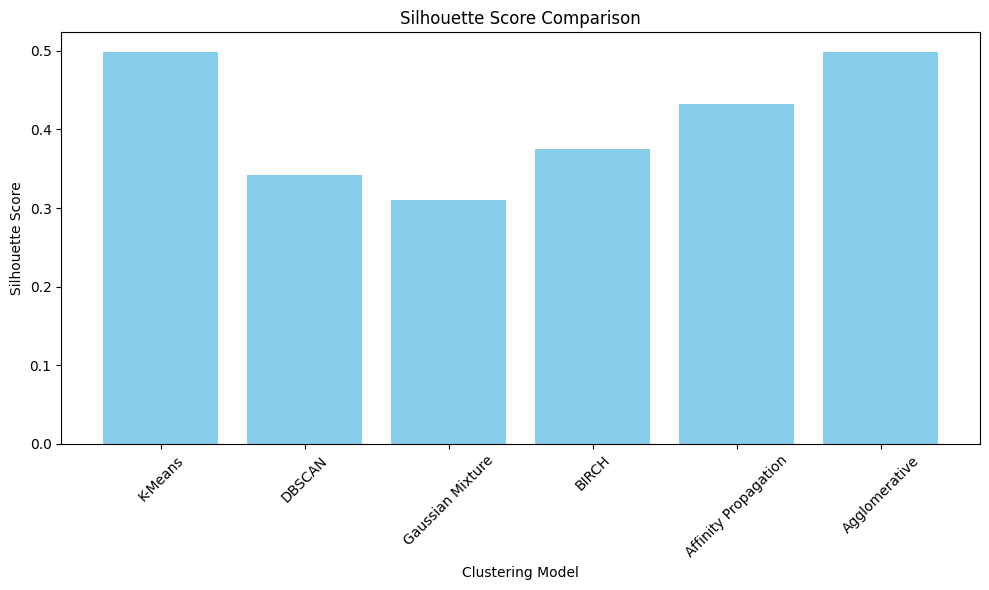

In [65]:
import matplotlib.pyplot as plt

# Assuming 'results_df' is already defined as shown above

# Plotting Silhouette Score
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Silhouette Score'], color='skyblue')
plt.title('Silhouette Score Comparison')
plt.xlabel('Clustering Model')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



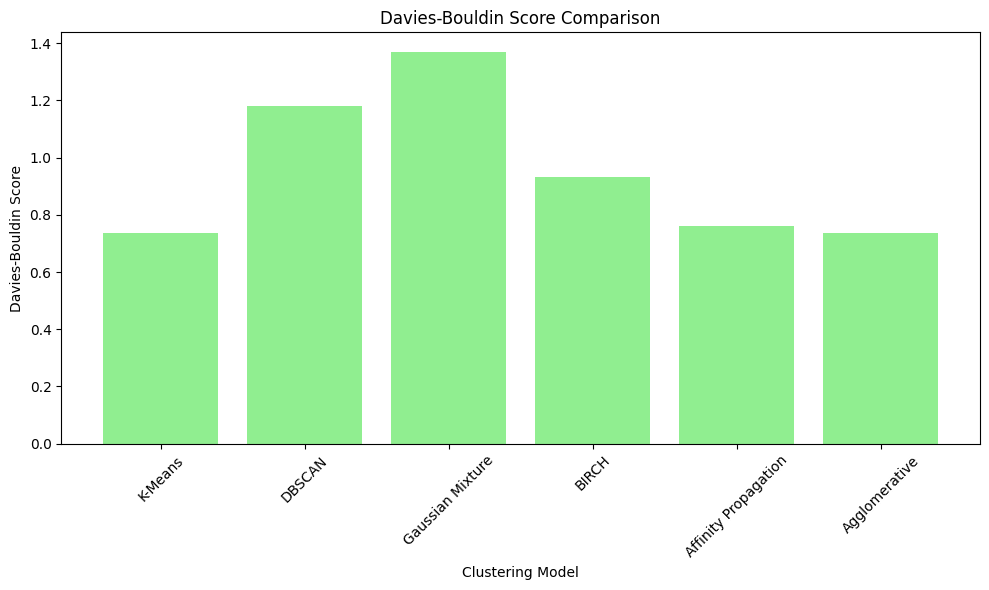

In [66]:

# Plotting Davies-Bouldin Score
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Davies-Bouldin Score'], color='lightgreen')
plt.title('Davies-Bouldin Score Comparison')
plt.xlabel('Clustering Model')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

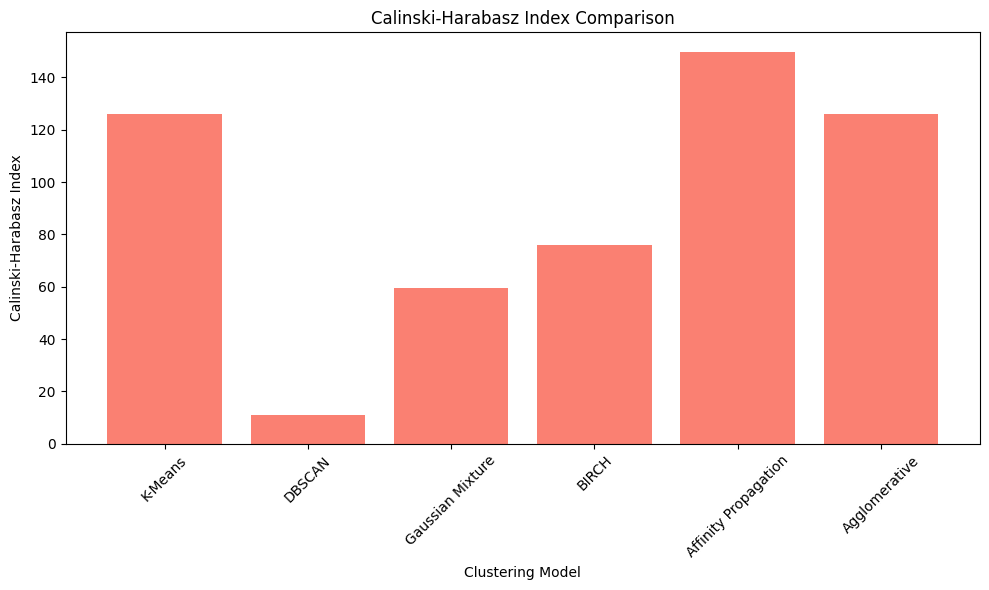

In [67]:
# Plotting Calinski-Harabasz Index
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Calinski-Harabasz Index'], color='salmon')
plt.title('Calinski-Harabasz Index Comparison')
plt.xlabel('Clustering Model')
plt.ylabel('Calinski-Harabasz Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()